## Load Dataset and Understand the data

### **Name : NIKHIL GR**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load iris dataset from sklearn library
data = load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

- Since we are using Unsupervised learning, we can not include target values because its data doesn't have any target values

In [4]:
iris_data = pd.DataFrame(data = data['data'], columns=data.feature_names)

In [5]:
# iris data without labels
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_data.shape

(150, 4)

In [7]:
# describe statistical information
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [9]:
# checking for null values
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

We need to find different flowers using above features. 
We have data which have only independent features.
Hence we can cluster all the similar looking data such that all the similar flowers are together.

- We need to find what will be the number of clusters (k)

## Data Visualization

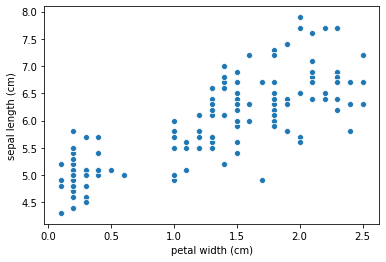

In [10]:
sns.scatterplot(iris_data['petal width (cm)'],iris_data['sepal length (cm)'])
plt.show()

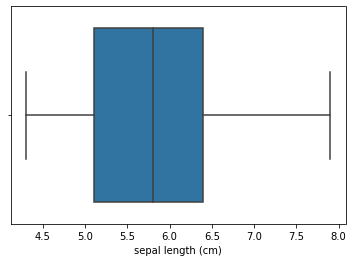

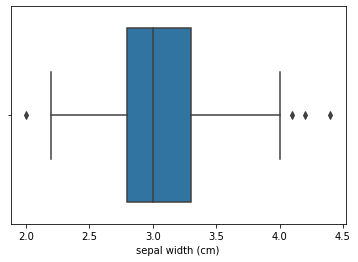

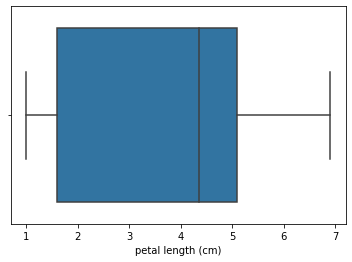

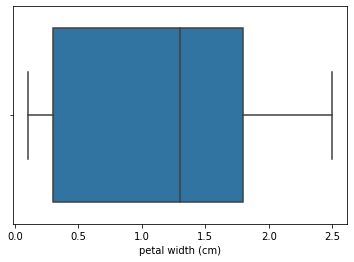

In [11]:
# checking for Outliers
for i in iris_data.describe().columns:
    sns.boxplot(iris_data[i])
    plt.show()

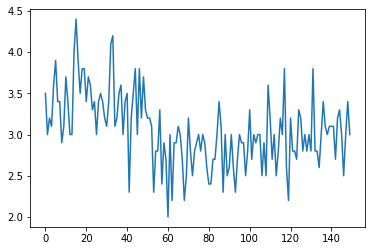

In [12]:
iris_data['sepal width (cm)'].plot() 
plt.show()

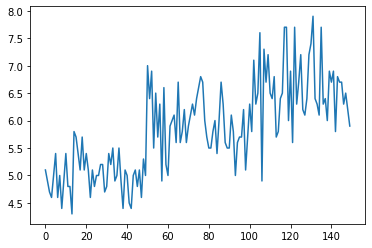

In [13]:
iris_data['sepal length (cm)'].plot()
plt.show()

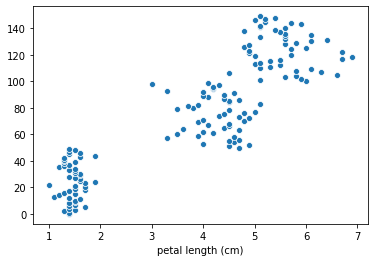

In [14]:
sns.scatterplot(iris_data['petal length (cm)'], iris_data.index)
plt.show()

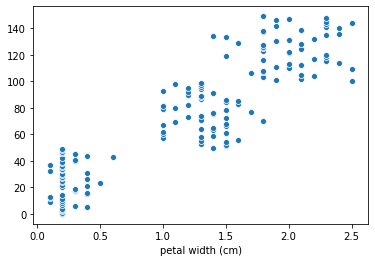

In [15]:
sns.scatterplot(iris_data['petal width (cm)'], iris_data.index)
plt.show()

- From ablove plot, we can see that 3 groups are formed
- So we can consider 3 clusters

## Scaling the Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
new_iris_data = iris_data.copy()
def make_min_max(new_iris_data, col):
    mms = MinMaxScaler()
    new_iris_data[col] = mms.fit_transform(new_iris_data[[col]])
    return new_iris_data

In [18]:
for col in new_iris_data.iloc[:,:]:
    new_iris_data = make_min_max(new_iris_data, col)
    

In [19]:
new_iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## Modelling 

In [20]:
from sklearn.cluster import KMeans

In [21]:
m = KMeans(n_clusters=3,max_iter=25)

- `n_clusters` :- number of cluster that we need to form
- `max_iter` :- number of iteration for the clusters
- Basically when clusters gets same centriod, at that time iteration for calculating the centroid will stop
- It is not that important to mention max_iter

In [22]:
m.fit(new_iris_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=25,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
m_pred = m.predict(new_iris_data)

In [24]:
m_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [25]:
# another way to see the clusters

m.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [26]:
centers = m.cluster_centers_

- These are the centroids which form during the cluster formation
- We have 4 features hence this cluster plot can be seen in 4-D space

In [27]:
values_iris = new_iris_data.values

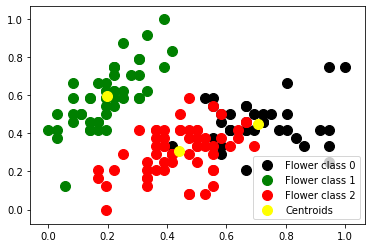

In [28]:
plt.scatter(values_iris[m_pred == 0, 0 ], values_iris[m_pred == 0, 1],
           s=100, c='black',label = 'Flower class 0')

plt.scatter(values_iris[m_pred == 1, 0 ], values_iris[m_pred == 1, 1],
           s=100, c='green',label = 'Flower class 1')

plt.scatter(values_iris[m_pred == 2, 0 ], values_iris[m_pred == 2, 1],
           s=100, c='red',label = 'Flower class 2')

plt.scatter(centers[:,0], centers[:,1],
           s = 100, c= 'yellow',label = 'Centroids')
plt.legend()
plt.show()

- Using elbow method also we can determine the number of clusters that has to be choosen

#### Elbo-Curve

In [29]:
ssd = {}
for clus in range(1,6,1):
    km = KMeans(n_clusters=clus, max_iter=50)
    km.fit(new_iris_data)
    ssd[clus] = km.inertia_
ssd

{1: 41.16611042137329,
 2: 12.127790750538194,
 3: 6.982216473785234,
 4: 5.525760232040968,
 5: 4.58977540011789}

In [30]:
cluster = list(ssd.keys())
inertia = list(ssd.values())

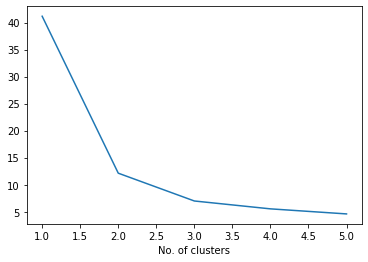

In [31]:
plt.plot(cluster,inertia)
plt.xlabel('No. of clusters')
plt.show()

#### So we have two possible number of clusters. We already have created model for `3 clusters`. Now lets's create a model for 2 clusters

In [32]:
km_new = KMeans(n_clusters=2,max_iter=25)
km_new.fit(new_iris_data)
km_new_pred = km_new.predict(new_iris_data)

In [33]:
centers_new = km_new.cluster_centers_

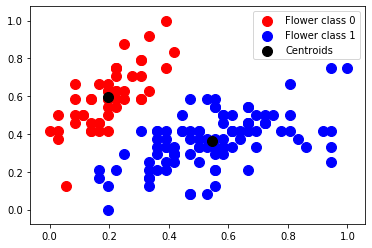

In [34]:
plt.scatter(values_iris[km_new_pred == 0, 0 ], values_iris[km_new_pred == 0, 1],
           s=100, c='red',label = 'Flower class 0')

plt.scatter(values_iris[km_new_pred == 1, 0 ], values_iris[km_new_pred == 1, 1],
           s=100, c='blue',label = 'Flower class 1')

plt.scatter(centers_new[:,0], centers_new[:,1],
           s = 100, c= 'black',label = 'Centroids')
plt.legend()
plt.show()